#### PCA, Hierarchical clustering and plotting on E. coli ß-Lactamase
This notebook is supposed to be a proof a concept, to show that our code runs on other datasets then our own (if sufficient data cleanup is performed).

In [7]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import data_exploration as de
import data_cleanup as dc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
betalac: pd.DataFrame = pd.read_csv('../DMS_data/BLAT_ECOLX_Stiffler_2015.csv')

#Data cleaning
norm_frame_betalac = dc.aufteilung_mut_pos(dc.norm(betalac))

In [9]:
dist_mut_betalac = de.dms_distance_matrix_wt(norm_frame_betalac)
dist_wt_betalac = de.dms_distance_matrix_mutated(norm_frame_betalac)

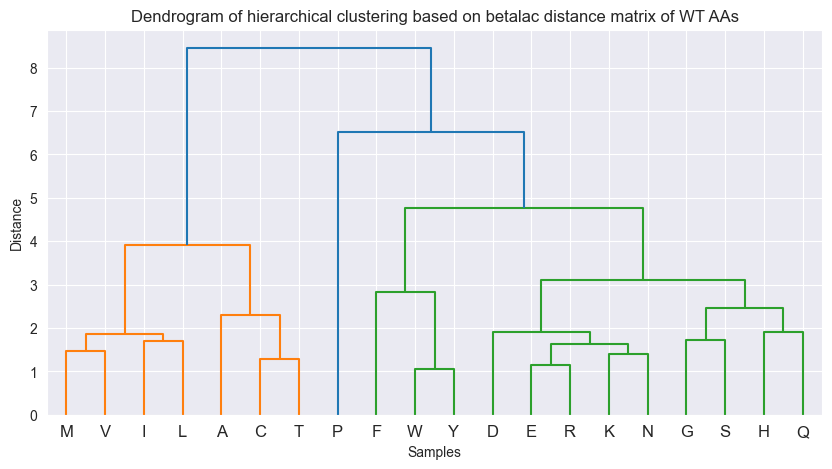

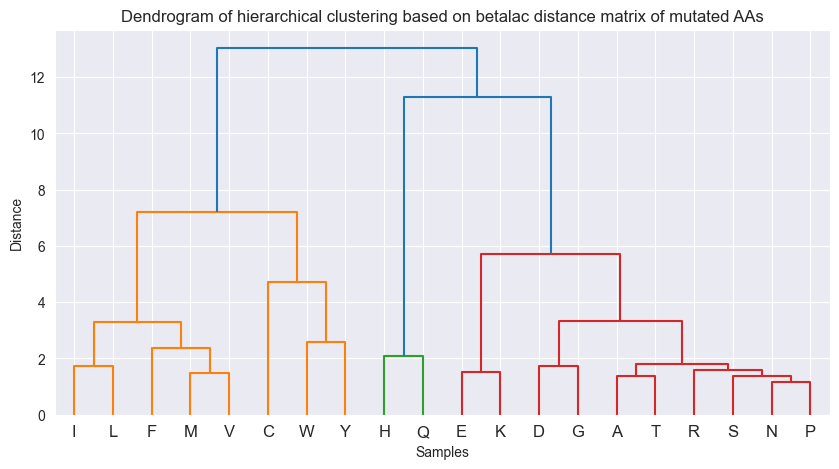

In [10]:
# hierarchical ward clustering
de.plot_hier_clust(dist_wt_betalac, title = "betalac distance matrix of WT AAs")
de.plot_hier_clust(dist_mut_betalac, title = "betalac distance matrix of mutated AAs")

In [11]:
#determine optimal amount of clusters. Algorithm not optimized, but quite a good estimation

#clusters_by_sil_betalac = de.determine_clusters_silhouette(dc.rmv_na(dc.df_transform(norm_frame_betalac)))
# does not work here, because dataset contains missing values outside of those, that are supposed to be zero (e.g. distance from E to E is always NaN)

#print (clusters_by_sil_betalac)

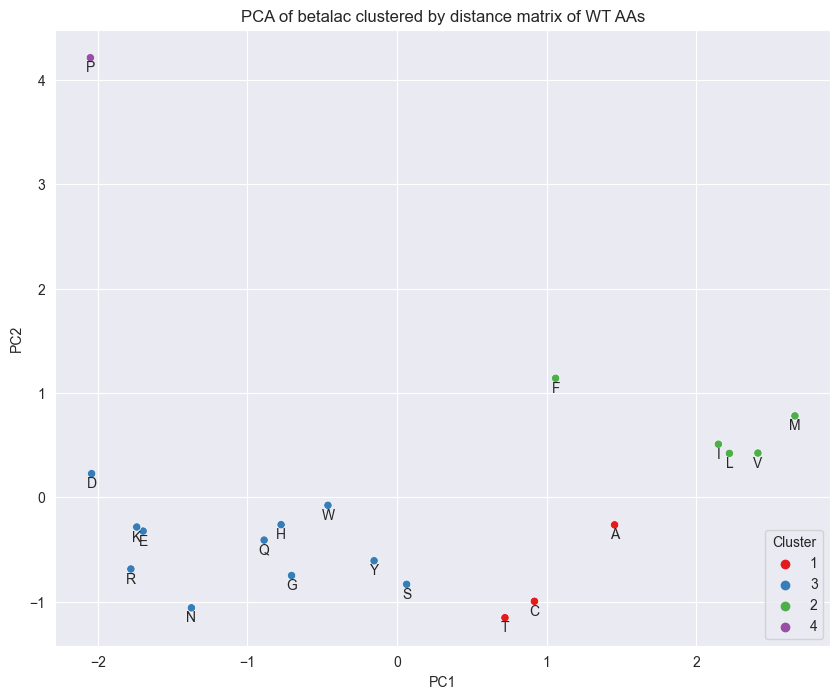

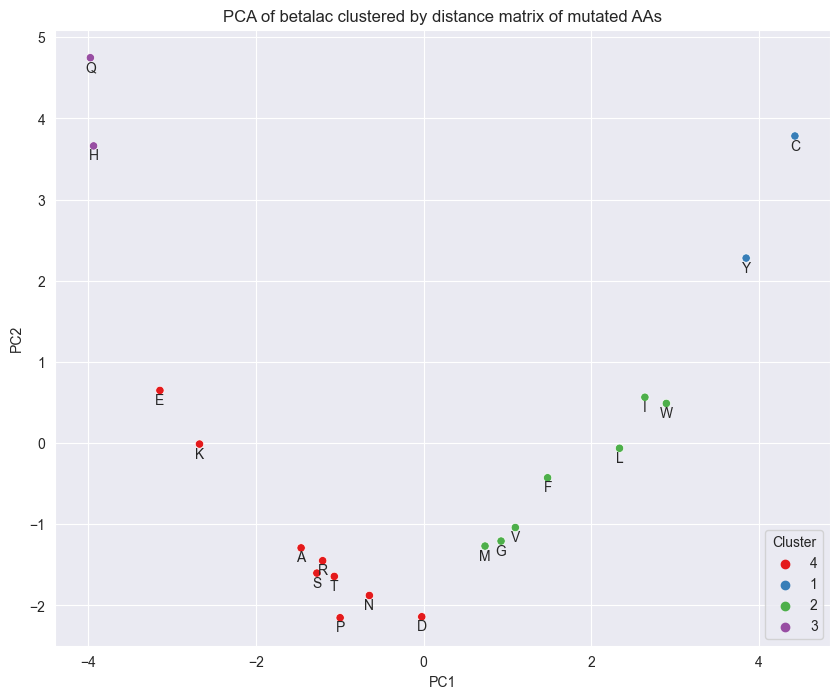

In [12]:
# Plotting, after pca and hierarchical clustering. clusters are defined by the colors shown in the legend.

de.pca_hierarchical_plot(dist_wt_betalac, optimal_num_cluster=4, title = "betalac clustered by distance matrix of WT AAs")
de.pca_hierarchical_plot(dist_mut_betalac, optimal_num_cluster=4, title = "betalac clustered by distance matrix of mutated AAs")